## Lana labs Data Science Assignment - Jiacheng Yao (jc07.yao@gmail.com)

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Read the input data
df_raw = pd.read_csv("Example MIX TYPES - Lana Labs.txt", sep="\t")

### I. Understanding the data

In [3]:
df_raw.shape

(3267, 37)

In [4]:
df_raw.head()

,TransID,ActivityName,Time,eLetter_Type,eLetter_ID,ShapeID,ShapeNumber,OK_After_Review_14_perc,OK_After_Review_17_perc,OK_After_Review_25_perc,...,Paste_In_Template_STD,Preempt,Priority,Pull_Target_List_MAX,Pull_Target_List_MIN,Review_13_AVG,Review_13_STD,Review_16_AVG,Review_16_STD,Send_On
0,1,Request,0.0,Type_1,1,767,1,100,100,100,...,10,False,0,2,1,30,15,30,15,10
1,1,Request,600.0,Type_1,1,767,1,100,100,100,...,10,False,0,2,1,30,15,30,15,10
2,1,Start,600.0,Type_1,1,1376,2,100,100,100,...,10,False,0,2,1,30,15,30,15,10
3,1,Start,600.0,Type_1,1,1376,2,100,100,100,...,10,False,0,2,1,30,15,30,15,10
4,1,Schedule Activities,600.0,Type_1,1,15,3,100,100,100,...,10,False,0,2,1,30,15,30,15,10


In [5]:
df_raw.describe()

,TransID,Time,eLetter_ID,ShapeID,ShapeNumber,OK_After_Review_14_perc,OK_After_Review_17_perc,OK_After_Review_25_perc,Analyze_Criteria_AVG,Analyze_Criteria_STD,...,Paste_In_Template_AVG,Paste_In_Template_STD,Priority,Pull_Target_List_MAX,Pull_Target_List_MIN,Review_13_AVG,Review_13_STD,Review_16_AVG,Review_16_STD,Send_On
count,3267.000000,3.267000e+03,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,...,3267.000000,3267.000000,3267.0,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000
mean,60.154882,1.283290e+06,122.195286,360.407713,12.667891,94.484236,95.863177,79.315886,14.701561,4.410468,...,66.157025,14.701561,0.0,2.940312,1.470156,44.104683,22.052342,44.104683,22.052342,14.701561
std,36.824120,7.307507e+05,83.821336,431.680976,7.647081,8.939580,6.704685,33.523424,8.482250,2.544675,...,38.170126,8.482250,0.0,1.696450,0.848225,25.446750,12.723375,25.446750,12.723375,8.482250
min,1.000000,0.000000e+00,1.000000,15.000000,1.000000,80.000000,85.000000,25.000000,10.000000,3.000000,...,45.000000,10.000000,0.0,2.000000,1.000000,30.000000,15.000000,30.000000,15.000000,10.000000
25%,29.000000,6.987488e+05,41.000000,62.000000,6.000000,80.000000,85.000000,25.000000,10.000000,3.000000,...,45.000000,10.000000,0.0,2.000000,1.000000,30.000000,15.000000,30.000000,15.000000,10.000000
50%,57.000000,1.307673e+06,113.000000,207.000000,12.000000,100.000000,100.000000,100.000000,10.000000,3.000000,...,45.000000,10.000000,0.0,2.000000,1.000000,30.000000,15.000000,30.000000,15.000000,10.000000
75%,87.000000,1.929900e+06,185.000000,287.000000,20.000000,100.000000,100.000000,100.000000,10.000000,3.000000,...,45.000000,10.000000,0.0,2.000000,1.000000,30.000000,15.000000,30.000000,15.000000,10.000000
max,151.000000,2.562409e+06,353.000000,1376.000000,27.000000,100.000000,100.000000,100.000000,30.000000,9.000000,...,135.000000,30.000000,0.0,6.000000,3.000000,90.000000,45.000000,90.000000,45.000000,30.000000


#### Q1.1: How many events do we have?

Here a very important question is: is ['ActivityName','eLetter_ID'] the unique identifier for events?

In [6]:
# Find the counts for each ['ActivityName','eLetter_ID'] combination. 
df_tmp_counter = df_raw.groupby(['ActivityName', 'eLetter_ID']).size().reset_index(name='Freq')
df_tmp_counter[df_tmp_counter['Freq']>2]

,ActivityName,eLetter_ID,Freq
538,Internal Review And Changes,14,4
546,Internal Review And Changes,38,4
558,Internal Review And Changes,98,6
566,Internal Review And Changes,122,8
606,OK?,1,6
607,OK?,2,6
608,OK?,4,6
609,OK?,5,6
610,OK?,13,6
611,OK?,14,8


As there are actually ['ActivityName','eLetter_ID'] combinations with more than 2 rows in raw data, it means ['ActivityName','eLetter_ID'] is not the unique identifier for events.

In [7]:
# Take a look at one example with 'Freq' > 2
df_test = df_raw[(df_raw['ActivityName']=='Internal Review And Changes')&(df_raw['eLetter_ID']==14)]

In [8]:
# show all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_test

,TransID,ActivityName,Time,eLetter_Type,eLetter_ID,ShapeID,ShapeNumber,OK_After_Review_14_perc,OK_After_Review_17_perc,OK_After_Review_25_perc,ProcessName,Analyze_Criteria_AVG,Analyze_Criteria_STD,Create_Initial_Draft_MAX,Create_Initial_Draft_MIN,Create_Proof_AVG,Create_Proof_STD,Delta_Time,Gather_Materials,Internal_Review_MAX,Internal_Review_MIN,Modify_Criteria_AVG,Modify_Criteria_STD,Optimize_Graphics_MAX,Optimize_Graphics_MIN,Outline_Text,Paste_In_Template_AVG,Paste_In_Template_STD,Preempt,Priority,Pull_Target_List_MAX,Pull_Target_List_MIN,Review_13_AVG,Review_13_STD,Review_16_AVG,Review_16_STD,Send_On
251,10,Internal Review And Changes,194944.398857,Type_2,14,95,10,80,85,25,Newsletter,10,3,5,3,30,10,2,20,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10
273,10,Internal Review And Changes,202151.542109,Type_2,14,95,10,80,85,25,Newsletter,10,3,5,3,30,10,2,20,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10
328,10,Internal Review And Changes,264040.698500,Type_2,14,95,10,80,85,25,Newsletter,10,3,5,3,30,10,2,20,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10
406,10,Internal Review And Changes,286565.221988,Type_2,14,95,10,80,85,25,Newsletter,10,3,5,3,30,10,2,20,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10


All other columns other than 'Time' have the same values for all four entries. And more importantly, there are other ['ActivityName','eLetter_ID'] combination entries inbetween as indicated by the indices: 251, 273, 328, 406. This means we should sort the original dataset first and then do the transformation. 

#### Q1.1-1 Preprocessing and Transformation

In [9]:
# Fix point provided by the client
time_base = datetime.datetime(2016, 1, 1, 10, 0, 0)

In [10]:
# Add a new column called TimeStamp that stores datetime format timestamp data
df_raw['TimeStamp'] = df_raw.apply(lambda row: time_base + datetime.timedelta(0, row[u'Time']), axis=1)

In [11]:
# sort the original dataset by ['ActivityName', 'eLetter_ID', 'Time'] 
# 1so that all entries with the same ['ActivityName', 'eLetter_ID'] will be adjacent to each other 
df_raw.sort_values(by=['ActivityName', 'eLetter_ID', 'TimeStamp'], inplace=True)

In [12]:
# Take another look after adding the new column
df_raw.head(10)

,TransID,ActivityName,Time,eLetter_Type,eLetter_ID,ShapeID,ShapeNumber,OK_After_Review_14_perc,OK_After_Review_17_perc,OK_After_Review_25_perc,ProcessName,Analyze_Criteria_AVG,Analyze_Criteria_STD,Create_Initial_Draft_MAX,Create_Initial_Draft_MIN,Create_Proof_AVG,Create_Proof_STD,Delta_Time,Gather_Materials,Internal_Review_MAX,Internal_Review_MIN,Modify_Criteria_AVG,Modify_Criteria_STD,Optimize_Graphics_MAX,Optimize_Graphics_MIN,Outline_Text,Paste_In_Template_AVG,Paste_In_Template_STD,Preempt,Priority,Pull_Target_List_MAX,Pull_Target_List_MIN,Review_13_AVG,Review_13_STD,Review_16_AVG,Review_16_STD,Send_On,TimeStamp
48,1,Create Initial Draft,86663.936862,Type_1,1,207,9,100,100,100,Newsletter,10,3,5,3,30,10,2,10,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10,2016-01-02 10:04:23.936862
84,1,Create Initial Draft,106382.944338,Type_1,1,207,9,100,100,100,Newsletter,10,3,5,3,30,10,2,10,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10,2016-01-02 15:33:02.944338
68,2,Create Initial Draft,88500.000000,Type_2,2,207,9,80,85,25,Newsletter,10,3,5,3,30,10,2,20,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10,2016-01-02 10:35:00.000000
86,2,Create Initial Draft,106890.731234,Type_2,2,207,9,80,85,25,Newsletter,10,3,5,3,30,10,2,20,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10,2016-01-02 15:41:30.731234
72,3,Create Initial Draft,90900.000000,Type_4,4,207,9,100,100,100,Newsletter,30,9,15,9,90,30,2,30,9,3,3,3,270,135,45,135,30,False,0,6,3,90,45,90,45,30,2016-01-02 11:15:00.000000
242,3,Create Initial Draft,186331.909560,Type_4,4,207,9,100,100,100,Newsletter,30,9,15,9,90,30,2,30,9,3,3,3,270,135,45,135,30,False,0,6,3,90,45,90,45,30,2016-01-03 13:45:31.909560
60,4,Create Initial Draft,87900.000000,Type_1,5,207,9,100,100,100,Newsletter,10,3,5,3,30,10,2,10,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10,2016-01-02 10:25:00.000000
82,4,Create Initial Draft,104720.828435,Type_1,5,207,9,100,100,100,Newsletter,10,3,5,3,30,10,2,10,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10,2016-01-02 15:05:20.828435
168,5,Create Initial Draft,174300.000000,Type_1,13,207,9,100,100,100,Newsletter,10,3,5,3,30,10,2,10,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10,2016-01-03 10:25:00.000000
244,5,Create Initial Draft,186616.543405,Type_1,13,207,9,100,100,100,Newsletter,10,3,5,3,30,10,2,10,3,1,1,1,90,45,15,45,10,False,0,2,1,30,15,30,15,10,2016-01-03 13:50:16.543405


In [13]:
# Transform the original data into the format that we want in the end
tmp_event_ID = 0
col_names =  ['ActivityName', 'eLetter_ID', 'Event_ID', 'eLetter_Type', 'Start', 'Complete']
df_transformed = pd.DataFrame(columns = col_names)
tmp_activity = None
tmp_eLetter = None

df_raw.iloc[[0]]
for index, row in df_raw.iterrows():
    if index == 0:
        tmp_activity = row['ActivityName']
        tmp_eLetter = row['eLetter_ID']
        
        df_transformed = df_transformed.append({
            'ActivityName' : row['ActivityName'], 
            'eLetter_ID' : row['eLetter_ID'],
            'Event_ID': tmp_event_ID,
            'eLetter_Type': row['eLetter_Type'],
            'Start': row['TimeStamp']
        } , ignore_index=True)
        tmp_event_ID = tmp_event_ID + 1
    else:
        if (row['ActivityName']==tmp_activity and row['eLetter_ID']==tmp_eLetter):
            df_transformed.loc[df_transformed.index[-1], 'Complete']= row['TimeStamp']
        else:
            tmp_activity = row['ActivityName']
            tmp_eLetter = row['eLetter_ID']
        
            tmp_event_ID = tmp_event_ID + 1
            df_transformed = df_transformed.append({
                'ActivityName' : row['ActivityName'], 
                'eLetter_ID' : row['eLetter_ID'],
                'Event_ID': tmp_event_ID,
                'eLetter_Type': row['eLetter_Type'],
                'Start': row['TimeStamp']
            } , ignore_index=True)

In [14]:
# Take a look after transformation
df_transformed.head(10)

,ActivityName,eLetter_ID,Event_ID,eLetter_Type,Start,Complete
0,Create Initial Draft,1,1,Type_1,2016-01-02 10:04:23.936862,2016-01-02 15:33:02.944338
1,Create Initial Draft,2,2,Type_2,2016-01-02 10:35:00.000000,2016-01-02 15:41:30.731234
2,Create Initial Draft,4,3,Type_4,2016-01-02 11:15:00.000000,2016-01-03 13:45:31.909560
3,Create Initial Draft,5,4,Type_1,2016-01-02 10:25:00.000000,2016-01-02 15:05:20.828435
4,Create Initial Draft,13,5,Type_1,2016-01-03 10:25:00.000000,2016-01-03 13:50:16.543405
5,Create Initial Draft,14,6,Type_2,2016-01-03 10:35:00.000000,2016-01-03 16:09:04.398857
6,Create Initial Draft,16,7,Type_4,2016-01-03 11:20:34.634009,2016-01-04 15:56:14.879615
7,Create Initial Draft,17,8,Type_1,2016-01-03 17:07:23.657716,2016-01-04 11:58:55.425826
8,Create Initial Draft,25,9,Type_1,2016-01-04 17:08:04.332226,2016-01-05 12:13:21.465206
9,Create Initial Draft,26,10,Type_2,2016-01-05 10:35:00.000000,2016-01-05 13:56:26.205356


In [15]:
print ("We have {} events".format(df_transformed.shape[0]))

We have 1396 events


#### Q1.2: How many events do we have for each activity name?

In [16]:
df_event_activity_groups = df_transformed.groupby(['ActivityName']).agg({'eLetter_ID': ['count']}).reset_index()
df_event_activity_groups.columns = ['ActivityName', 'Count']
# order by count
df_event_activity_groups.sort_values(by=['Count'], ascending=False, inplace=True)

In [17]:
df_event_activity_groups

,ActivityName,Count
22,Start,88
2,Broadcast Request for Related Articles,88
18,Schedule Activities,88
16,Request,88
8,Gather Materials,76
6,Delay,76
13,"Outline Text, Targeting, and URLs",64
0,Create Initial Draft,63
4,Create Initial Target List,63
9,Internal Review And Changes,62


[Text(0,0,'Start'),
 Text(0,0,'Broadcast Request for Related Articles'),
 Text(0,0,'Schedule Activities'),
 Text(0,0,'Request'),
 Text(0,0,'Gather Materials'),
 Text(0,0,'Delay'),
 Text(0,0,'Outline Text, Targeting, and URLs'),
 Text(0,0,' Create Initial Draft'),
 Text(0,0,'Create Initial Target List'),
 Text(0,0,'Internal Review And Changes'),
 Text(0,0,'Optimize Graphics'),
 Text(0,0,'Paste In Template'),
 Text(0,0,'Create Proof'),
 Text(0,0,'Review'),
 Text(0,0,'OK?'),
 Text(0,0,'Send Email'),
 Text(0,0,'Send On'),
 Text(0,0,'Analyze Criteria'),
 Text(0,0,'Send To Production'),
 Text(0,0,'Pull Target List'),
 Text(0,0,'End'),
 Text(0,0,'Modify Criteria'),
 Text(0,0,'Change')]

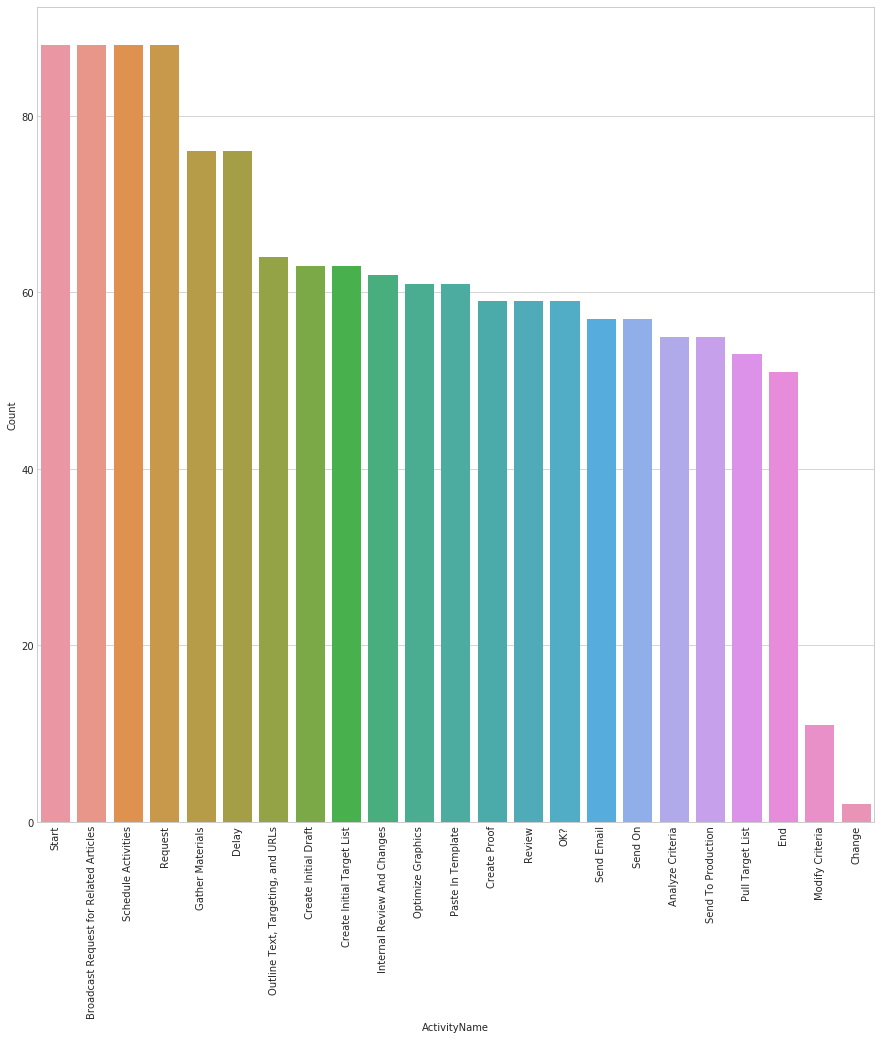

In [18]:
# plot the event count for each acitivity name
fig, axis = plt.subplots(1,1,figsize=(15,15))

sns.barplot(x='ActivityName', y='Count', data=df_event_activity_groups, order=df_event_activity_groups['ActivityName'].unique(), ax=axis)
axis.set_xticks(range(len(df_event_activity_groups['ActivityName'].unique())))
axis.set_xticklabels(df_event_activity_groups['ActivityName'].unique(), rotation=90)
# plt.tight_layout()

#### Q1.3: How many cases do we have?

In [19]:
print ("We have {} cases".format(len(df_transformed['eLetter_ID'].unique())))

We have 88 cases


#### Q1.4: There’s an eLetter_Type attribute. What values does it have and how often do they occur?

In [20]:
df_transformed['eLetter_Type'].unique()

array(['Type_1', 'Type_2', 'Type_4'], dtype=object)

In [21]:
df_eletter_type_groups = df_transformed.groupby(['eLetter_Type']).agg({'eLetter_ID': ['count']}).reset_index()
df_eletter_type_groups.columns = ['eLetter_Type', 'Count']
# order by count
df_eletter_type_groups.sort_values(by=['eLetter_Type'], ascending=True, inplace=True)

In [22]:
df_eletter_type_groups

,eLetter_Type,Count
0,Type_1,696
1,Type_2,364
2,Type_4,336


[Text(0,0,'Type_1'), Text(0,0,'Type_2'), Text(0,0,'Type_4')]

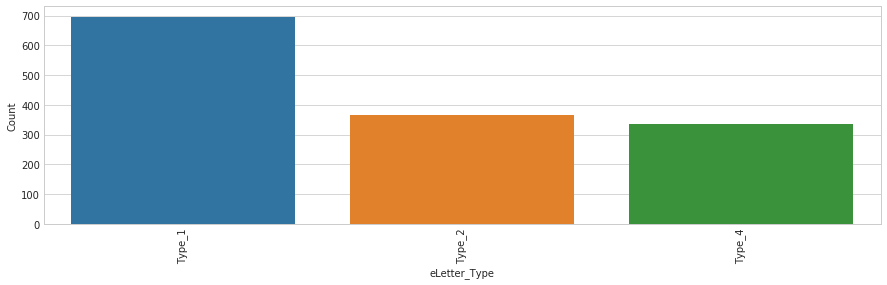

In [23]:
# plot the event count for each eLetter_Type
fig, axis = plt.subplots(1,1,figsize=(15,4))

sns.barplot(x='eLetter_Type', y='Count', data=df_eletter_type_groups, order=df_eletter_type_groups['eLetter_Type'].unique(), ax=axis)
axis.set_xticks(range(len(df_eletter_type_groups['eLetter_Type'].unique())))
axis.set_xticklabels(df_eletter_type_groups['eLetter_Type'].unique(), rotation=90)
# plt.tight_layout()

### II. Transforming the data into an event log

#### Q2.1. Calculating the timestamps for each row
##### Timestamps already calculated in Q1.1-1 Preprocessing and Transformation and stored in the df_transformed dataframe

#### Q2.2. Combining two subsequent rows for the same activity into one with start and complete timestamp.

##### The rows in the raw data have already been combined in Q1.1-1 Preprocessing and Transformation and stored in the df_transformed dataframe

Time Complexity of the Transformation Algorithm: T(Transformation) = T(Sort) + T(Combine) = O(nlog(n))+O(n) = O(nlog(n)), in which n is the number of rows in the dataset.

#### Q2.3. Removing all rows for which we do not have a matching second row.

In [24]:
df_transformed_filtered = df_transformed[pd.notnull(df_transformed['Complete'])]

In [25]:
# which means the following events will be filtered out
df_transformed[pd.isnull(df_transformed['Complete'])]

,ActivityName,eLetter_ID,Event_ID,eLetter_Type,Start,Complete
62,Create Initial Draft,256,63,Type_4,2016-01-30 16:06:07.107872,NaN
116,Analyze Criteria,206,117,Type_2,2016-01-30 18:22:02.802744,NaN
117,Analyze Criteria,209,118,Type_1,2016-01-30 18:46:38.373820,NaN
194,Broadcast Request for Related Articles,301,195,Type_1,2016-01-26 10:25:31.648369,NaN
195,Broadcast Request for Related Articles,302,196,Type_2,2016-01-26 12:39:46.369816,NaN
196,Broadcast Request for Related Articles,304,197,Type_4,2016-01-26 16:26:07.048816,NaN
197,Broadcast Request for Related Articles,305,198,Type_1,2016-01-26 18:41:05.132647,NaN
198,Broadcast Request for Related Articles,337,199,Type_1,2016-01-29 10:34:28.690591,NaN
199,Broadcast Request for Related Articles,338,200,Type_2,2016-01-29 12:25:05.798800,NaN
200,Broadcast Request for Related Articles,340,201,Type_4,2016-01-29 16:29:07.153507,NaN


#### Q3.1.1: How many events do we have?

In [26]:
print ("We have {} events".format(df_transformed_filtered.shape[0]))

We have 1352 events


#### Q3.1.2: How many events do we have for each activity name?

In [27]:
df_event_activity_groups = df_transformed_filtered.groupby(['ActivityName']).agg({'eLetter_ID': ['count']}).reset_index()
df_event_activity_groups.columns = ['ActivityName', 'Count']
# order by count
df_event_activity_groups.sort_values(by=['Count'], ascending=False, inplace=True)

In [28]:
df_event_activity_groups

,ActivityName,Count
22,Start,88
18,Schedule Activities,88
16,Request,88
2,Broadcast Request for Related Articles,76
6,Delay,76
8,Gather Materials,64
13,"Outline Text, Targeting, and URLs",63
0,Create Initial Draft,62
9,Internal Review And Changes,61
12,Optimize Graphics,61


[Text(0,0,'Start'),
 Text(0,0,'Schedule Activities'),
 Text(0,0,'Request'),
 Text(0,0,'Broadcast Request for Related Articles'),
 Text(0,0,'Delay'),
 Text(0,0,'Gather Materials'),
 Text(0,0,'Outline Text, Targeting, and URLs'),
 Text(0,0,' Create Initial Draft'),
 Text(0,0,'Internal Review And Changes'),
 Text(0,0,'Optimize Graphics'),
 Text(0,0,'Paste In Template'),
 Text(0,0,'Review'),
 Text(0,0,'OK?'),
 Text(0,0,'Create Proof'),
 Text(0,0,'Send On'),
 Text(0,0,'Create Initial Target List'),
 Text(0,0,'Send To Production'),
 Text(0,0,'Analyze Criteria'),
 Text(0,0,'Pull Target List'),
 Text(0,0,'Send Email'),
 Text(0,0,'End'),
 Text(0,0,'Modify Criteria'),
 Text(0,0,'Change')]

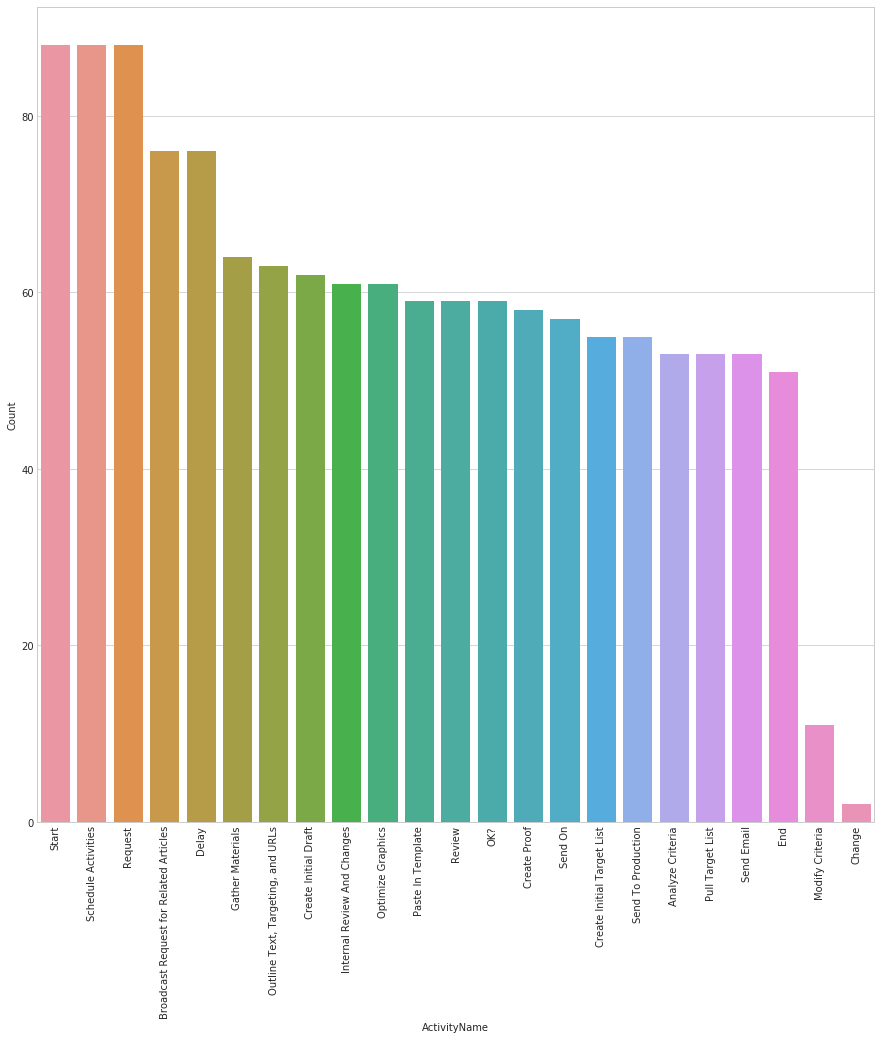

In [29]:
# plot the event count for each acitivity name
fig, axis = plt.subplots(1,1,figsize=(15,15))

sns.barplot(x='ActivityName', y='Count', data=df_event_activity_groups, order=df_event_activity_groups['ActivityName'].unique(), ax=axis)
axis.set_xticks(range(len(df_event_activity_groups['ActivityName'].unique())))
axis.set_xticklabels(df_event_activity_groups['ActivityName'].unique(), rotation=90)
# plt.tight_layout()

#### Q3.1.3: How many cases do we have?

In [30]:
print ("We have {} cases".format(len(df_transformed_filtered['eLetter_ID'].unique())))

We have 88 cases


#### Q3.1.4: There’s an eLetter_Type attribute. What values does it have and how often do they occur?

In [31]:
df_transformed_filtered['eLetter_Type'].unique()

array(['Type_1', 'Type_2', 'Type_4'], dtype=object)

In [32]:
df_eletter_type_groups = df_transformed_filtered.groupby(['eLetter_Type']).agg({'eLetter_ID': ['count']}).reset_index()
df_eletter_type_groups.columns = ['eLetter_Type', 'Count']
# order by count
df_eletter_type_groups.sort_values(by=['eLetter_Type'], ascending=True, inplace=True)

In [33]:
df_eletter_type_groups

,eLetter_Type,Count
0,Type_1,675
1,Type_2,352
2,Type_4,325


[Text(0,0,'Type_1'), Text(0,0,'Type_2'), Text(0,0,'Type_4')]

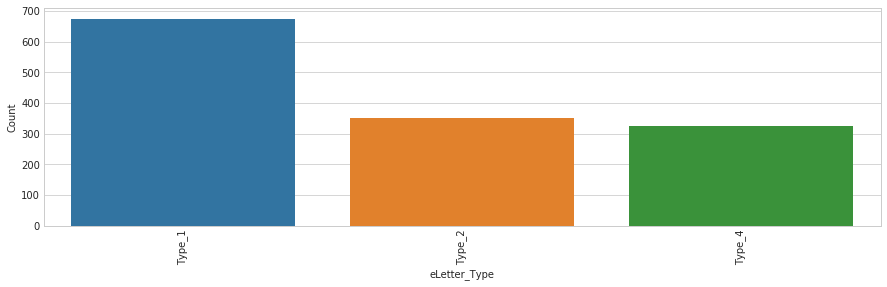

In [34]:
# plot the event count for each eLetter_Type
fig, axis = plt.subplots(1,1,figsize=(15,4))

sns.barplot(x='eLetter_Type', y='Count', data=df_eletter_type_groups, order=df_eletter_type_groups['eLetter_Type'].unique(), ax=axis)
axis.set_xticks(range(len(df_eletter_type_groups['eLetter_Type'].unique())))
axis.set_xticklabels(df_eletter_type_groups['eLetter_Type'].unique(), rotation=90)
# plt.tight_layout()

#### Q3.2: Calculate the difference between start and complete time for each event and show the distribution

In [35]:
df_final = df_transformed_filtered.copy()

In [36]:
df_final['Time_Elapsed'] = df_final.apply(lambda row: (row['Complete'] - row['Start']).total_seconds(), axis=1)

In [37]:
df_final = df_final[[u'ActivityName', u'eLetter_ID', u'Event_ID', u'eLetter_Type', u'Start', u'Complete', u'Time_Elapsed']]

In [38]:
df_final['Time_Elapsed_in_Hours'] = df_final.apply(lambda row: int(row['Time_Elapsed'])/3600, axis=1)

In [39]:
df_final.head()

,ActivityName,eLetter_ID,Event_ID,eLetter_Type,Start,Complete,Time_Elapsed,Time_Elapsed_in_Hours
0,Create Initial Draft,1,1,Type_1,2016-01-02 10:04:23.936862,2016-01-02 15:33:02.944338,19719.007476,5
1,Create Initial Draft,2,2,Type_2,2016-01-02 10:35:00.000000,2016-01-02 15:41:30.731234,18390.731234,5
2,Create Initial Draft,4,3,Type_4,2016-01-02 11:15:00.000000,2016-01-03 13:45:31.909560,95431.909560,26
3,Create Initial Draft,5,4,Type_1,2016-01-02 10:25:00.000000,2016-01-02 15:05:20.828435,16820.828435,4
4,Create Initial Draft,13,5,Type_1,2016-01-03 10:25:00.000000,2016-01-03 13:50:16.543405,12316.543405,3


/home/jiacheng/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


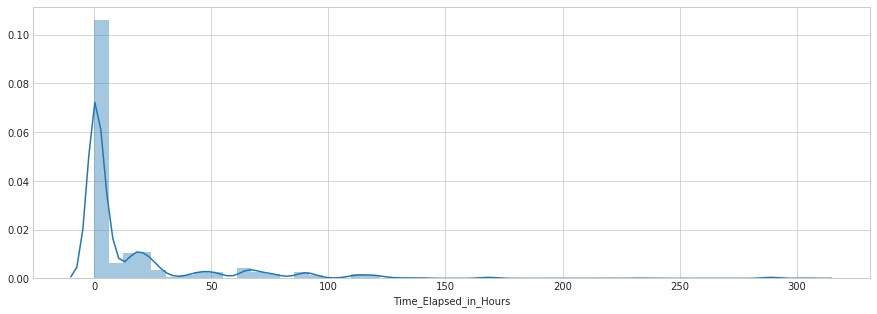

In [40]:
# plot the distribution for the difference between start and complete time of the events
fig, axis = plt.subplots(1,1,figsize=(15,5))

sns.distplot(df_final['Time_Elapsed_in_Hours'], ax=axis)
# plt.tight_layout()

#### Q3.3: (Optional): Surprise as with something interesting you found in the data :-)

I will investigate the time spent for each eLetter_Type and each ActivityName and see which event types use up the most amount of time and need desperate efficiency improvement.

In [41]:
df_event_type_times = df_final.groupby(['eLetter_Type']).agg({'Time_Elapsed_in_Hours': ['median', 'mean', 'sum']}).reset_index()
df_event_type_times.columns = ['eLetter_Type', 'Time_Median', 'Time_Mean', 'Time_Sum']
# order by mean
df_event_type_times.sort_values(by=['Time_Mean'], ascending=False, inplace=True)
df_event_type_times

,eLetter_Type,Time_Median,Time_Mean,Time_Sum
1,Type_2,1,21.468750,7557
2,Type_4,3,18.560000,6032
0,Type_1,1,14.594074,9851


In [42]:
df_activity_times = df_final.groupby(['ActivityName']).agg({'Time_Elapsed_in_Hours': ['median', 'mean', 'sum']}).reset_index()
df_activity_times.columns = ['ActivityName', 'Time_Median', 'Time_Mean', 'Time_Sum']
# order by mean
df_activity_times.sort_values(by=['Time_Mean'], ascending=False, inplace=True)
df_activity_times

,ActivityName,Time_Median,Time_Mean,Time_Sum
19,Send Email,50.0,62.169811,3295
8,Gather Materials,46.5,56.578125,3621
4,Create Initial Target List,49.0,54.927273,3021
2,Broadcast Request for Related Articles,47.0,48.907895,3717
11,OK?,24.0,37.559322,2216
0,Create Initial Draft,19.0,24.693548,1531
3,Change,24.5,24.500000,49
9,Internal Review And Changes,3.0,17.819672,1087
17,Review,2.0,16.000000,944
12,Optimize Graphics,2.0,15.573770,950


It seems that tasks such as Send Email, Gather Materials, Broadcast Request for Related Articles are taking quite long times and need to be accelerated. Especially with Broadcast Request for Related Articles and Gather Materials, as we see before that these are also the most of the activity types that have nonfinished events:

In [43]:
df_transformed_unfinished = df_transformed[pd.isnull(df_transformed['Complete'])]

In [44]:
df_unfinished_activity_groups = df_transformed_unfinished.groupby(['ActivityName']).agg({'eLetter_ID': ['count']}).reset_index()
df_unfinished_activity_groups.columns = ['ActivityName', 'Count']

[Text(0,0.5,'Count (Unfinished)'), Text(0.5,0,'ActivityName')]

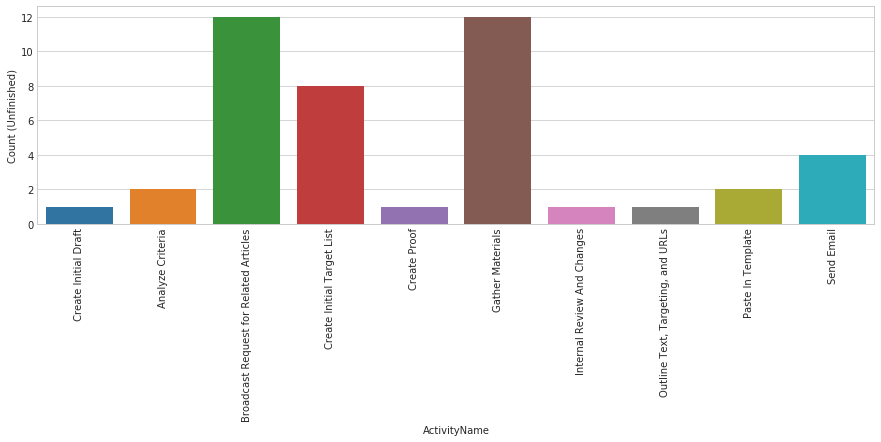

In [46]:
# plot the event count for each Activity Type
fig, axis = plt.subplots(1,1,figsize=(15,4))

sns.barplot(x='ActivityName', y='Count', data=df_unfinished_activity_groups, order=df_unfinished_activity_groups['ActivityName'].unique(), ax=axis)
axis.set_xticks(range(len(df_unfinished_activity_groups['ActivityName'].unique())))
axis.set_xticklabels(df_unfinished_activity_groups['ActivityName'].unique(), rotation=90)
axis.set(xlabel='ActivityName', ylabel='Count (Unfinished)')
# plt.tight_layout()

#### Q3.4: (Super Bonus): Add something fun to your analysis that has something to do with penguins. For example, you may fast forward the starting date of your events to last week and use the standard Twitter search API to get the number of tweets about penguins for each day. This you could add as an extra column to each event so we exactly know how much people talked about penguins while our process was running :-)

See in the specific notebook named assignment_lanalabs(twitter_penguins).pynb